In [1]:
import numpy as np
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import AdaBoostClassifier
from sklearn.metrics import classification_report, confusion_matrix, roc_auc_score, auc, roc_curve
from sklearn.model_selection import train_test_split
from sklearn.datasets import load_iris
from sklearn.preprocessing import StandardScaler

In [2]:
iris = load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['species']= iris.target

In [3]:
data.head(3)

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0


In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
sepal length (cm)    150 non-null float64
sepal width (cm)     150 non-null float64
petal length (cm)    150 non-null float64
petal width (cm)     150 non-null float64
species              150 non-null int64
dtypes: float64(4), int64(1)
memory usage: 5.9 KB


In [5]:
data.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),species
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333,1.000000
std,0.828066,0.435866,1.765298,0.762238,0.819232
min,4.300000,2.000000,1.000000,0.100000,0.000000
25%,5.100000,2.800000,1.600000,0.300000,0.000000
50%,5.800000,3.000000,4.350000,1.300000,1.000000
75%,6.400000,3.300000,5.100000,1.800000,2.000000
max,7.900000,4.400000,6.900000,2.500000,2.000000


In [6]:
data.isna().sum()

sepal length (cm)    0
sepal width (cm)     0
petal length (cm)    0
petal width (cm)     0
species              0
dtype: int64

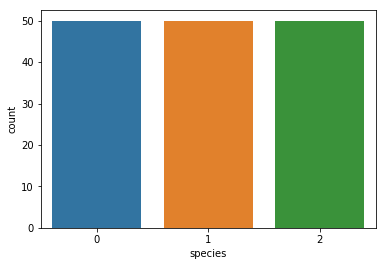

In [7]:
sns.countplot(data['species'])

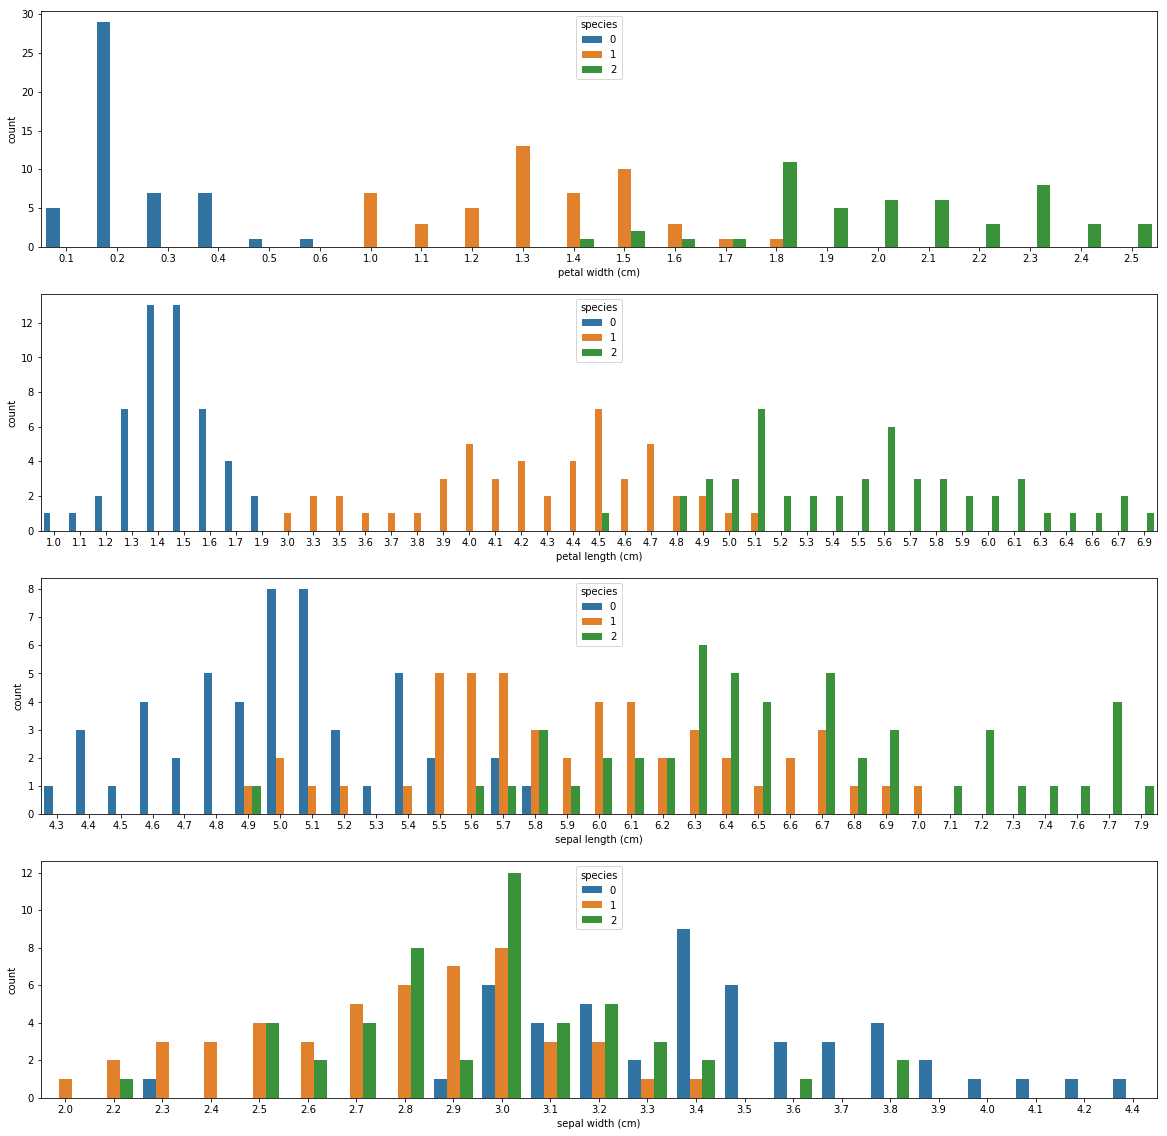

In [8]:
plt.figure(figsize=(20,20))

plt.subplot(411)
sns.countplot(x=data['petal width (cm)'], hue=data['species'])

plt.subplot(412)
sns.countplot(x=data['petal length (cm)'], hue=data['species'])

plt.subplot(413)
sns.countplot(x=data['sepal length (cm)'], hue=data['species'])

plt.subplot(414)
sns.countplot(x=data['sepal width (cm)'], hue=data['species'])


/home/fsz/Environnements/learning/lib/python3.5/site-packages/scipy/stats/stats.py:1713: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


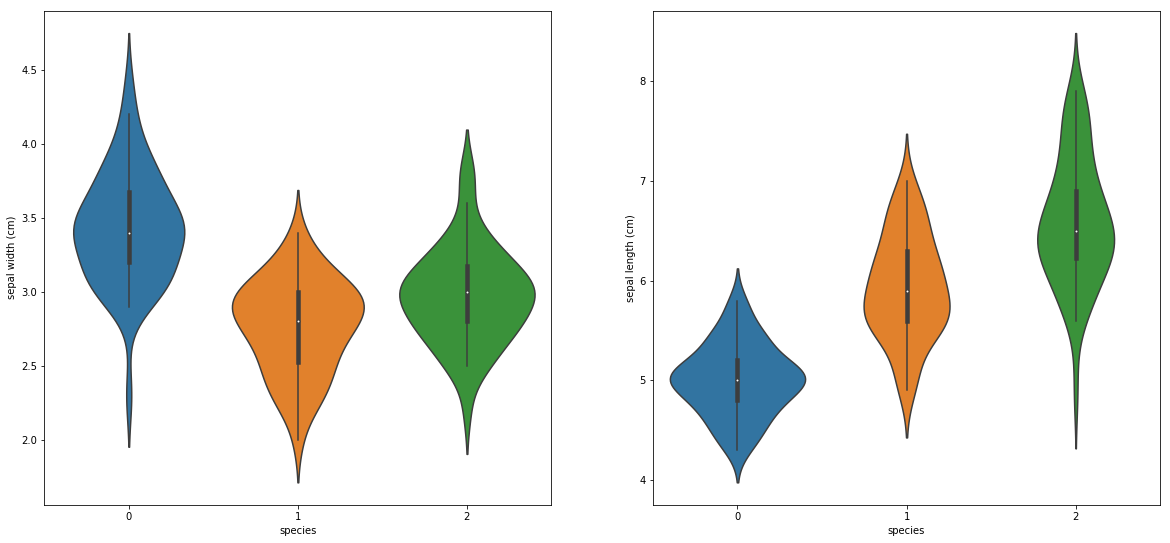

In [9]:
plt.figure(figsize=(20,20))
plt.subplot(221)
sns.violinplot(x='species', y='sepal width (cm)', data=data)

plt.subplot(222)
sns.violinplot(x='species',y='sepal length (cm)', data=data)

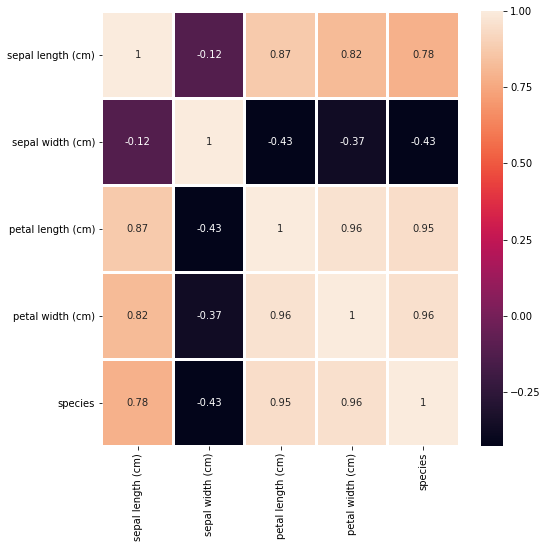

In [10]:
correlation = data.corr()
plt.figure(figsize=(8,8))
sns.heatmap(correlation, annot=True, linewidths=2)

In [11]:
X  = data.drop('species',axis=1)
y = data['species']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [12]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

print('Accuracy:', adaboost.score(X_test, y_test))
y_pred = adaboost.predict(X_test)

print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy: 0.9
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00         8
           1       0.83      0.91      0.87        11
           2       0.90      0.82      0.86        11

    accuracy                           0.90        30
   macro avg       0.91      0.91      0.91        30
weighted avg       0.90      0.90      0.90        30



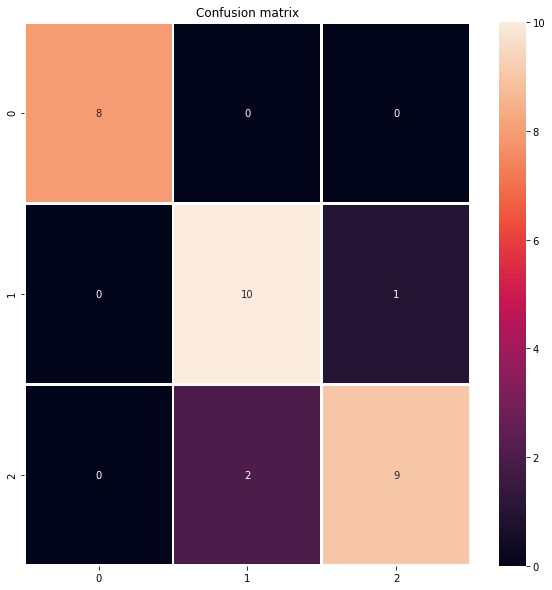

In [13]:
plt.figure(figsize=(10,10))
plt.title('Confusion matrix')
sns.heatmap(confusion_matrix(y_test,y_pred), annot=True, linewidths=2)

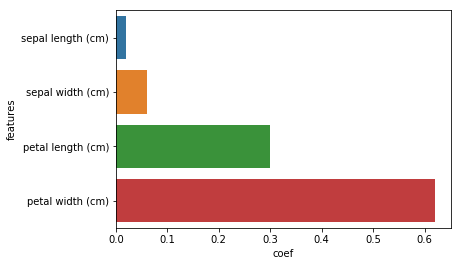

In [14]:
df = pd.DataFrame(adaboost.feature_importances_, X.columns).reset_index()
df = df.rename(columns={'index':'features', 0:'coef'})
df = df.sort_values(by='coef', ascending=True)
sns.barplot(x='coef',y='features',data=df)

In [15]:
X  = data.drop('species',axis=1)
X = X.drop(['sepal length (cm)','sepal width (cm)'],axis=1)
y = data['species']

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2)

In [17]:
adaboost = AdaBoostClassifier()
adaboost.fit(X_train, y_train)

print('Accuracy:', adaboost.score(X_test, y_test))
y_pred = adaboost.predict(X_test)

print('Classification report: \n', classification_report(y_test, y_pred))

Accuracy: 0.9666666666666667
Classification report: 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        11
           1       0.89      1.00      0.94         8
           2       1.00      0.91      0.95        11

    accuracy                           0.97        30
   macro avg       0.96      0.97      0.96        30
weighted avg       0.97      0.97      0.97        30

